In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [30]:
df = pd.read_csv('student_scores.csv')

df.shape
df.describe()

    Hours  Scores
0     2.5      21
1     5.1      47
2     3.2      27
3     8.5      75
4     3.5      30
5     1.5      20
6     9.2      88
7     5.5      60
8     8.3      81
9     2.7      25
10    7.7      85
11    5.9      62
12    4.5      41
13    3.3      42
14    1.1      17
15    8.9      95
16    2.5      30
17    1.9      24
18    6.1      67
19    7.4      69
20    2.7      30
21    4.8      54
22    3.8      35
23    6.9      76
24    7.8      86


,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


<AxesSubplot:title={'center':'scores vs Hours Studied'}, xlabel='Hours', ylabel='Scores'>

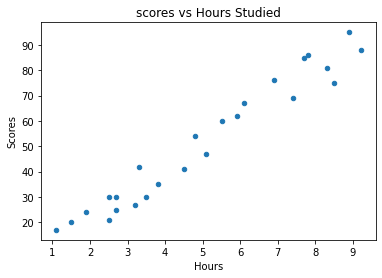

In [31]:
df.plot(kind='scatter', x='Hours', y='Scores', title='scores vs Hours Studied')

In [32]:
print(df.corr())

           Hours    Scores
Hours   1.000000  0.976191
Scores  0.976191  1.000000


In [33]:
X = df.iloc[:, :-1].values
y = df.iloc[:, 1].values

In [34]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
# The above code split 80% to the training dataset and 20% to the test dataset.

In [51]:
print(X_train)
print(y_train)
print(X_test)
print(y_test)

[[3.8]
 [1.9]
 [7.8]
 [6.9]
 [1.1]
 [5.1]
 [7.7]
 [3.3]
 [8.3]
 [9.2]
 [6.1]
 [3.5]
 [2.7]
 [5.5]
 [2.7]
 [8.5]
 [2.5]
 [4.8]
 [8.9]
 [4.5]]
[35 24 86 76 17 47 85 42 81 88 67 30 25 60 30 75 21 54 95 41]
[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]
[20 27 69 30 62]


In [35]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [36]:
print(regressor.intercept_)

2.018160041434662


In [37]:
print(regressor.coef_)

[9.91065648]


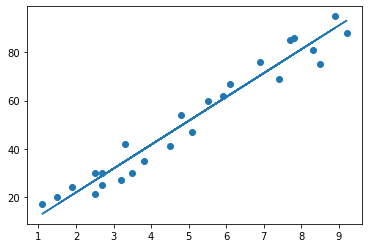

In [38]:
line = regressor.coef_*X+regressor.intercept_

plt.scatter(X, y)
plt.plot(X, line);
plt.show()

In [39]:
y_pred = regressor.predict(X_test)

In [40]:
score = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
score

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [50]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("R Squared using built-in function: ", r2_score(y_test, regressor.predict(X_test)))

Mean Absolute Error: 4.183859899002982
Mean Squared Error: 21.598769307217456
Root Mean Squared Error: 4.647447612100373
R Squared using built-in function:  0.9454906892105354


In [42]:
df['SST'] = np.square(df['Scores'] - df['Scores'].mean())
df['SSR'] = np.square(df['Scores'] - df['Scores'].mean())
print("Sum of SSR:", df['SSR'].sum())
print("Sum of SST:", df['SST'].sum())
print("R Squared using manual calculation: ", df['SSR'].sum() / df['SST'].sum())

Sum of SSR: 15346.24
Sum of SST: 15346.24
R Squared using manual calculation:  1.0


In [43]:
hours = 9.25
test = np.array([hours])
test = test.reshape(-1, 1)
pred = regressor.predict(test)
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(pred[0]))

No of Hours = 9.25
Predicted Score = 93.69173248737539


In [44]:
print("Intercept: ", regressor.intercept_)
print("Coefficient: ", regressor.coef_)

Intercept:  2.018160041434662
Coefficient:  [9.91065648]


In [45]:
print("Manual prdiction :",  2.018160041434662+9.91065648*9.25)

Manual prdiction : 93.69173248143466


In [46]:
result = regressor.score(X_test, y_test)
print("Accuracy:", (result*100.0))

Accuracy: 94.54906892105353
